In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
# Set visual theme
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



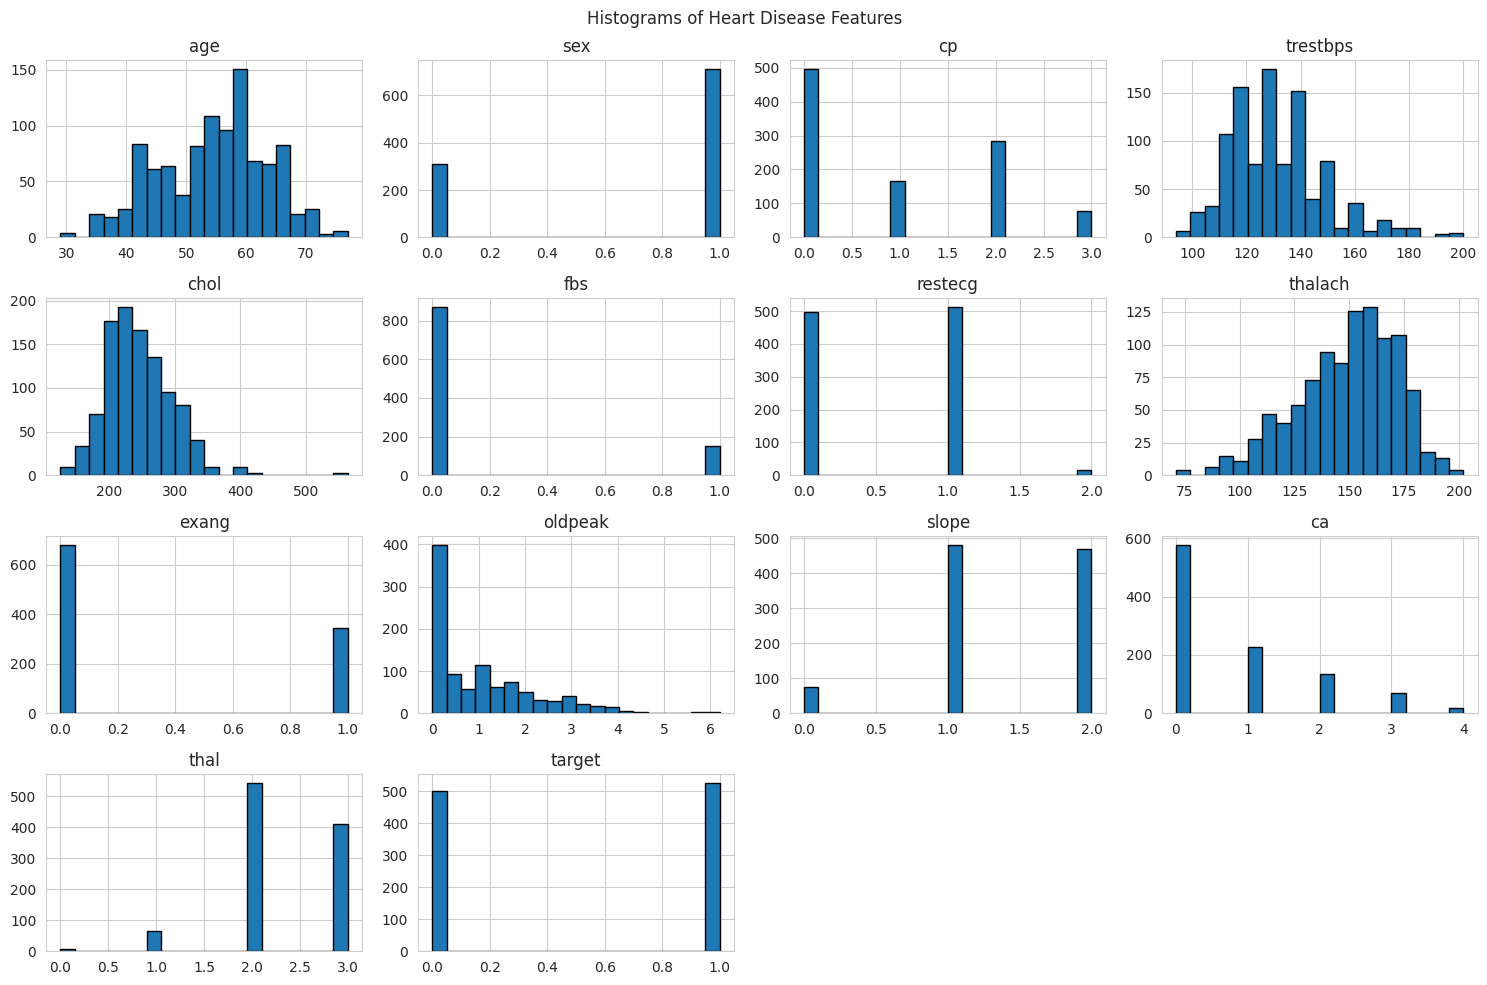

In [ ]:
# 1. Histogram of all features
df.hist(figsize=(15, 10), edgecolor='black', bins=20)
plt.suptitle("Histograms of Heart Disease Features")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.show()

NameError: name 'rf' is not defined

<Axes: >

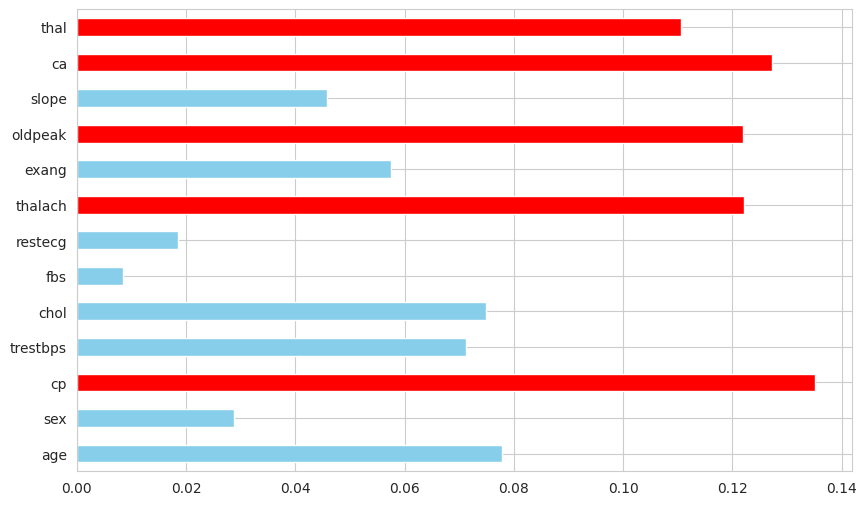

In [ ]:
top_n = 5
colors = ['red' if i in feat_importances.nlargest(top_n).index else 'skyblue' for i in feat_importances.index]
feat_importances.plot(kind='barh', figsize=(10,6), color=colors)

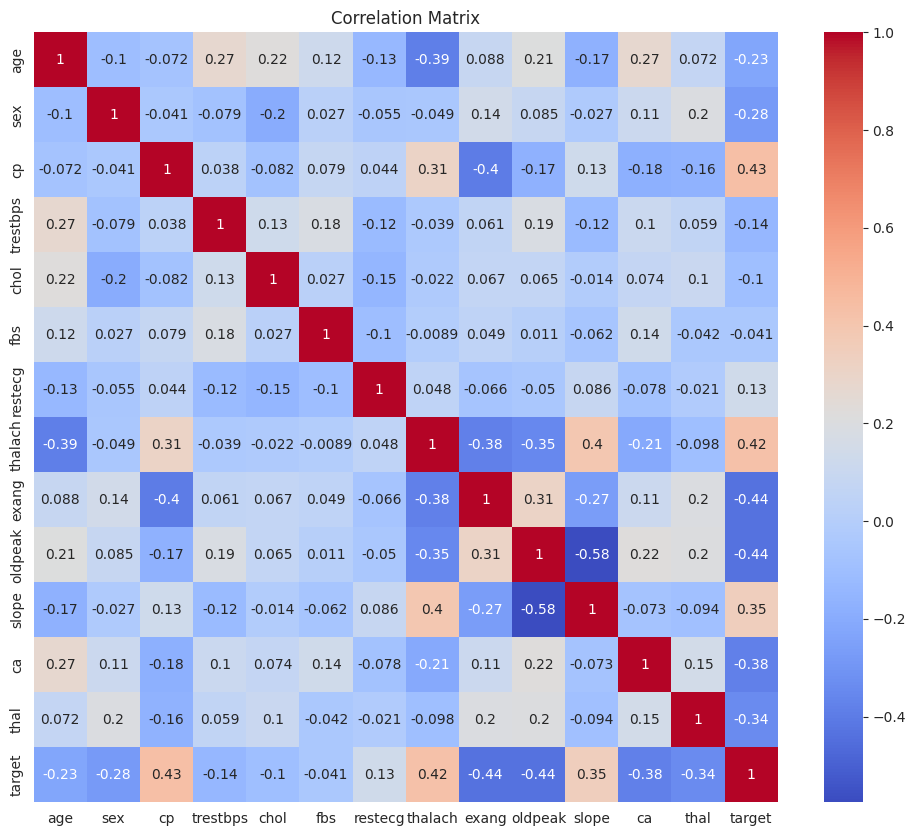

In [ ]:
# 2. Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-11-1fad6af47b85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='flare')


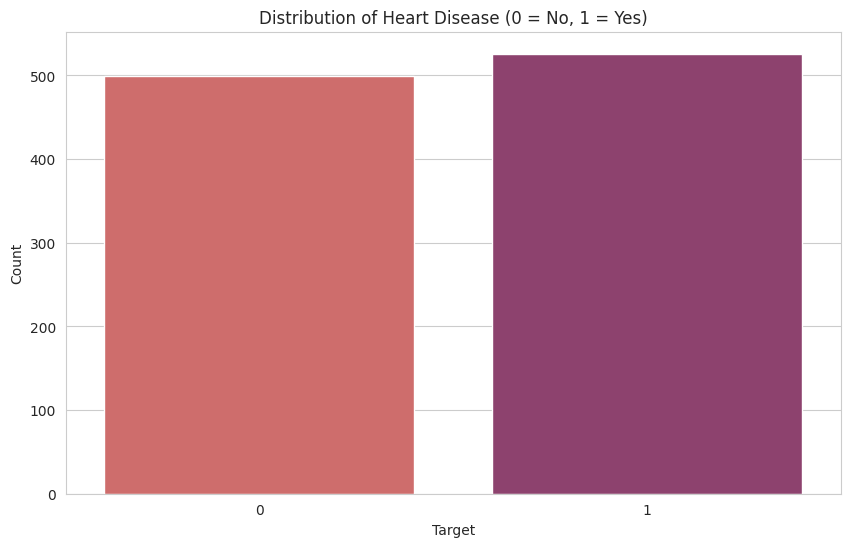

In [ ]:
# 3. Countplot of target variable (Heart Disease presence)
sns.countplot(x='target', data=df, palette='flare')
plt.title("Distribution of Heart Disease (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

<ipython-input-12-f49dd6a4b233>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='flare')
<ipython-input-12-f49dd6a4b233>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, hue=None, palette='flare')


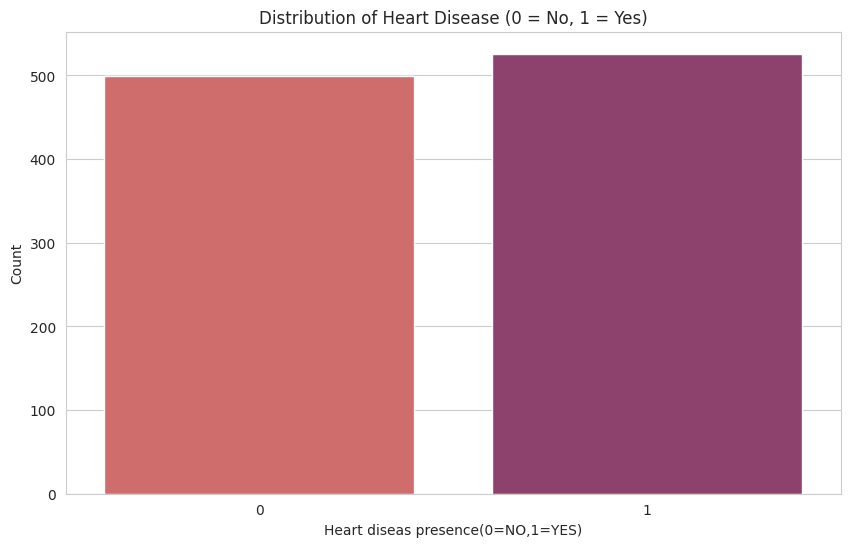

In [ ]:
# 3. Countplot of target variable (Heart Disease presence)
sns.countplot(x='target', data=df, palette='flare')
plt.title("Distribution of Heart Disease (0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
palette=['ff9999','#66b3ff']
plt.xlabel("Heart diseas presence(0=NO,1=YES)")
sns.countplot(x='target', data=df, hue=None, palette='flare')
plt.show()

In [ ]:
# 4. Data preprocessing for classifier comparison
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 5. Compare Classifier Accuracies
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

accuracy_scores = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=10)
    accuracy_scores[name] = scores.mean()

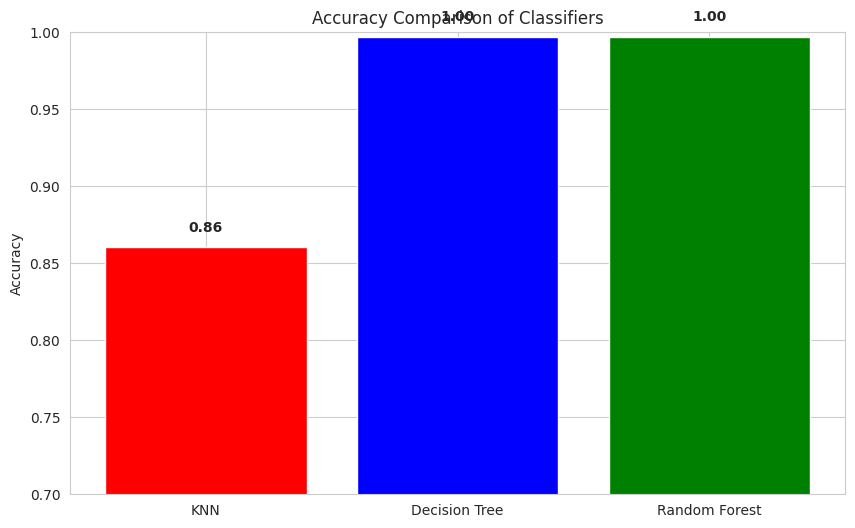

In [ ]:
# Plot accuracy comparison
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['red', 'blue', 'green'])
plt.title("Accuracy Comparison of Classifiers")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
for i, (name, score) in enumerate(accuracy_scores.items()):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontweight='bold')
plt.show()

In [ ]:
# Models and their accuracies
models = [
   "KNN", "Random Forest", "Decision Tree", "Logistic Regression"

]
accuracies = [0.86, 1.0, 1.0,1.5]

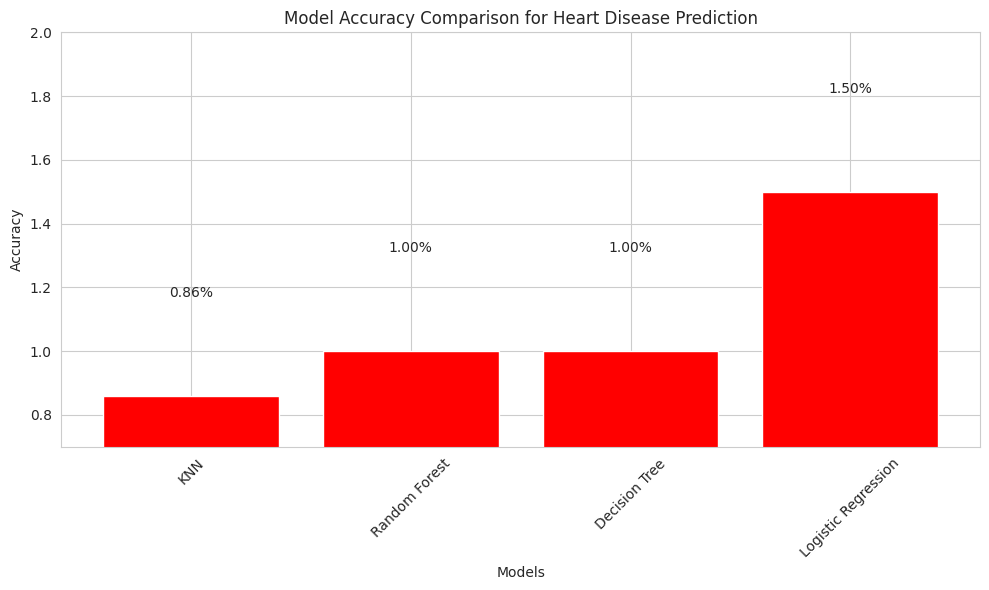

In [ ]:
# Plot

plt.figure(figsize=(10, 6))

bars = plt.bar(models, accuracies, color='red')

plt.ylim(0.7, 2.0)

plt.xlabel("Models")

plt.ylabel("Accuracy")

plt.title("Model Accuracy Comparison for Heart Disease Prediction")



# Annotate bars

for bar in bars:

    yval = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.2f}%', ha='center', va='bottom')



plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

Text(0.5, 1.02, 'Pairwise Feature Relationships')

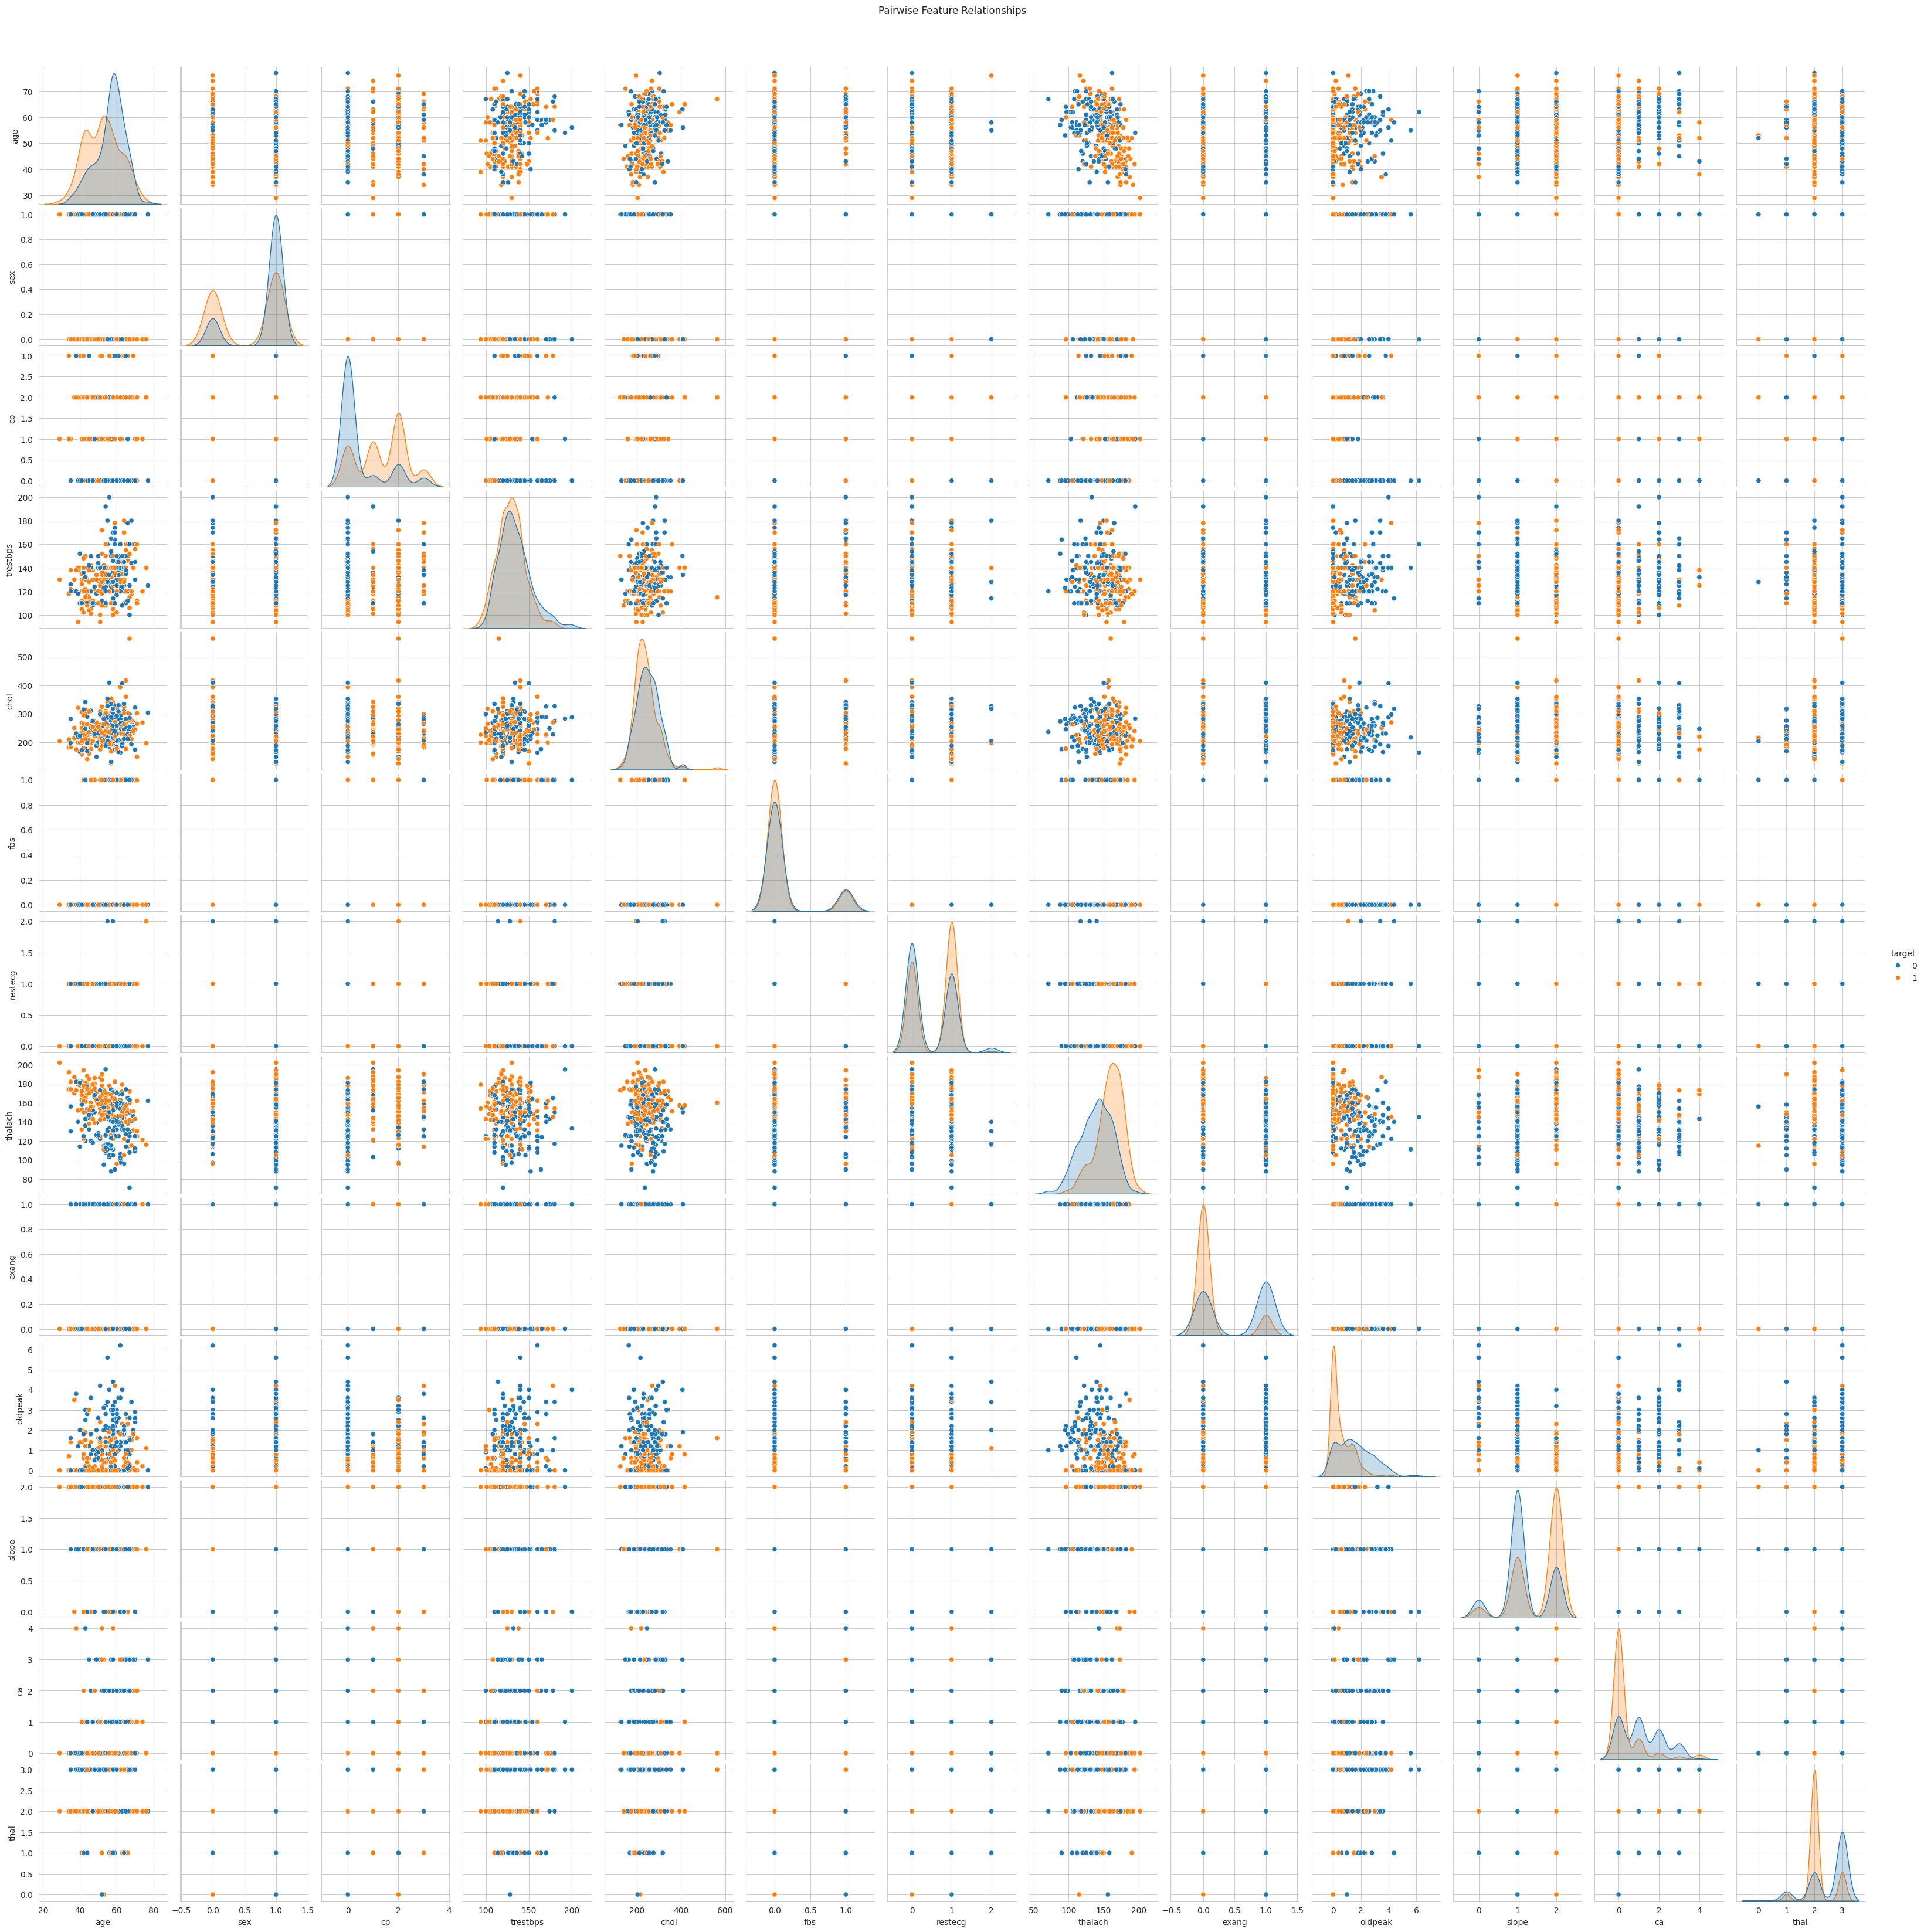

In [ ]:
sns.pairplot(df, hue='target')  # Assuming 'target' is the label column
plt.suptitle("Pairwise Feature Relationships", y=1.02)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# y_test = label_binarize(y_test, classes=[0, 1, 2])
# Use OneVsRest strategy and compute micro/macro average AUC



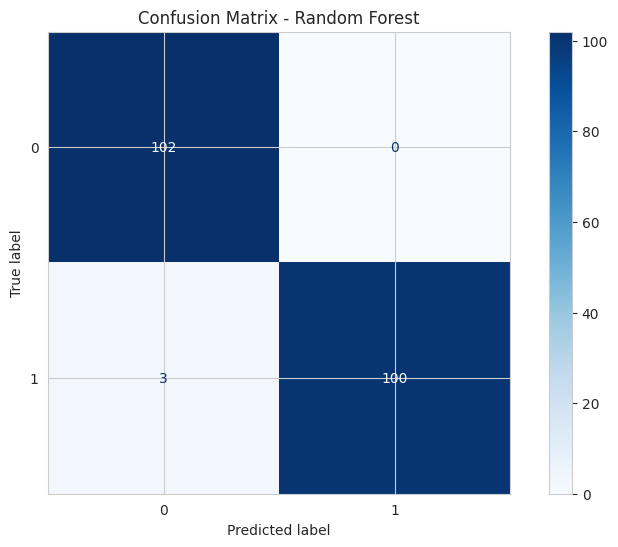

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

  No Disease       0.97      1.00      0.99       102
     Disease       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



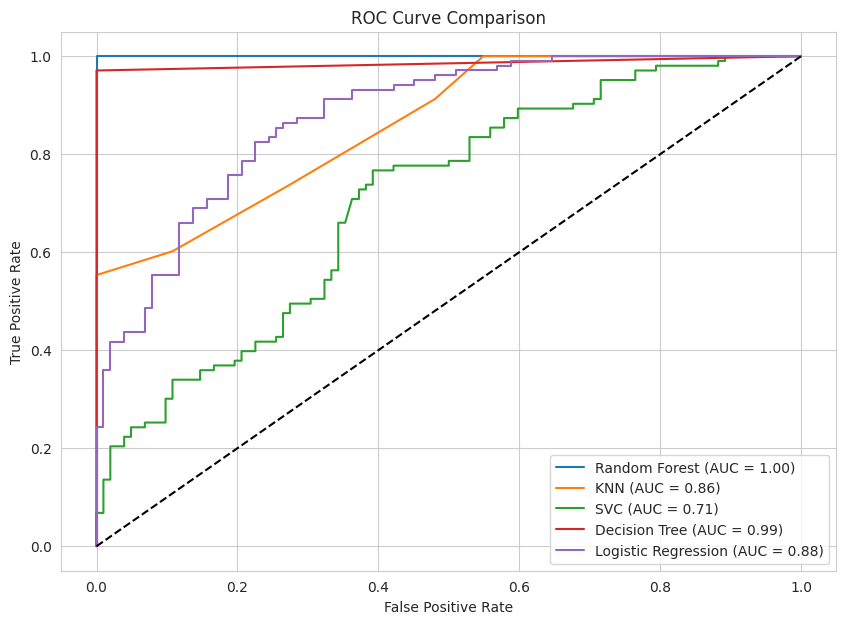

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()